A Tour of Machine Learning
Classifiers Using Scikit-Learn

In [1]:
from sklearn import datasets
import numpy as np

In [19]:
iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target
print('Class labels: ', np.unique(y))


Class labels:  [0 1 2]


In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=0.3, random_state=1, stratify=y
)
X_test

array([[5.4, 2.3],
       [1.7, 0.4],
       [1.4, 0.3],
       [4.5, 1.7],
       [4.4, 1.4],
       [4. , 1.3],
       [5.8, 1.8],
       [4.5, 1.5],
       [5.3, 1.9],
       [1.3, 0.4],
       [1.5, 0.4],
       [4.9, 1.8],
       [1.4, 0.2],
       [3.3, 1. ],
       [1.4, 0.2],
       [4.8, 1.4],
       [5.1, 2.3],
       [4.5, 1.5],
       [4.3, 1.3],
       [5.2, 2. ],
       [5.9, 2.1],
       [1.4, 0.1],
       [4.4, 1.4],
       [4.9, 2. ],
       [4.2, 1.3],
       [4.7, 1.6],
       [3. , 1.1],
       [5.7, 2.5],
       [1.6, 0.6],
       [5. , 2. ],
       [1.6, 0.2],
       [1.4, 0.2],
       [4. , 1. ],
       [4. , 1.3],
       [6.3, 1.8],
       [5.5, 2.1],
       [1.4, 0.1],
       [1.6, 0.2],
       [1.4, 0.2],
       [4.7, 1.4],
       [5.7, 2.3],
       [5.1, 1.8],
       [4.6, 1.5],
       [1.5, 0.2],
       [1.5, 0.1]])

In [4]:
print('Labels counts in y:', np.bincount(y))

print('Labels counts in y_train:', np.bincount(y_train))

print('Labels counts in y_test:', np.bincount(y_test))

Labels counts in y: [50 50 50]
Labels counts in y_train: [35 35 35]
Labels counts in y_test: [15 15 15]


In [26]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)
X_test_std

array([[ 0.89820289,  1.44587881],
       [-1.16537974, -1.04507821],
       [-1.33269725, -1.17618121],
       [ 0.39625036,  0.65926081],
       [ 0.34047786,  0.2659518 ],
       [ 0.11738784,  0.1348488 ],
       [ 1.12129291,  0.79036381],
       [ 0.39625036,  0.3970548 ],
       [ 0.84243039,  0.92146681],
       [-1.38846976, -1.04507821],
       [-1.27692475, -1.04507821],
       [ 0.61934037,  0.79036381],
       [-1.33269725, -1.30728421],
       [-0.27301968, -0.2584602 ],
       [-1.33269725, -1.30728421],
       [ 0.56356787,  0.2659518 ],
       [ 0.73088538,  1.44587881],
       [ 0.39625036,  0.3970548 ],
       [ 0.28470535,  0.1348488 ],
       [ 0.78665788,  1.05256981],
       [ 1.17706541,  1.18367281],
       [-1.33269725, -1.43838721],
       [ 0.34047786,  0.2659518 ],
       [ 0.61934037,  1.05256981],
       [ 0.22893285,  0.1348488 ],
       [ 0.50779537,  0.5281578 ],
       [-0.4403372 , -0.1273572 ],
       [ 1.0655204 ,  1.70808482],
       [-1.22115225,

In [6]:
from sklearn.linear_model import Perceptron
ppn = Perceptron(eta0=0.1, random_state=1)
ppn.fit(X_train_std, y_train)

Perceptron(eta0=0.1, random_state=1)

In [7]:
y_pred = ppn.predict(X_test_std)
print('Misclassified examples: %d' % (y_test != y_pred).sum())

Misclassified examples: 1


In [8]:
from sklearn.metrics import accuracy_score
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))

Accuracy: 0.978


In [9]:
print('Accuracy: %.3f' % ppn.score(X_test_std, y_test))

Accuracy: 0.978


In [10]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

def plot_decision_regions(X, y, classifier, test_idx=None,
                         resolution=0.02):
    # setup marker generator and color map
    markers = ('o', 's', '^', 'v', '<')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    lab = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    lab = lab.reshape(xx1.shape)
    plt.contourf(xx1, xx2, lab, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    # plot class examples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],
                    y=X[y == cl, 1],
                   alpha=0.8,
                   c=colors[idx],
                   marker=markers[idx],
                   label=f'Class {cl}',
                   edgecolor='black')
        
        # highlight test examples
        if test_idx:
            # plot all examples
            X_test, y_test = X[test_idx, :], y[test_idx]
            
            plt.scatter(X_test[:, 0], X_test[:, 1],
                        c='none', edgecolor='black', alpha=1.0,
                        linewidth=1, marker='o',
                        s=100, label='Test set')
            

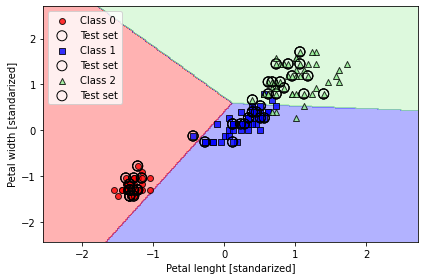

In [11]:
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X=X_combined_std,
                      y=y_combined,
                      classifier=ppn,
                         test_idx=range(105, 150))
plt.xlabel('Petal lenght [standarized]')
plt.ylabel('Petal width [standarized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

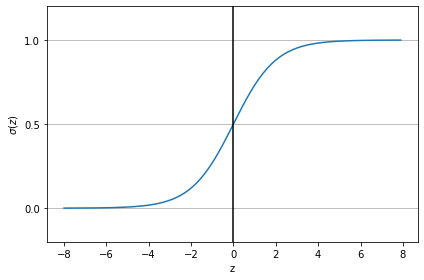

In [12]:
import matplotlib.pyplot as plt
import numpy as np

def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))

z = np.arange(-8, 8, 0.1)
sigma_z = sigmoid(z)
plt.plot(z, sigma_z)
plt.axvline(0.0, color='k')
plt.ylim(-0.2, 1.2)
plt.xlabel('z')
plt.ylabel('$\sigma (z)$')
plt.yticks([0.0, 0.5, 1.0])
ax = plt.gca()
ax.yaxis.grid(True)
plt.tight_layout()
plt.show()

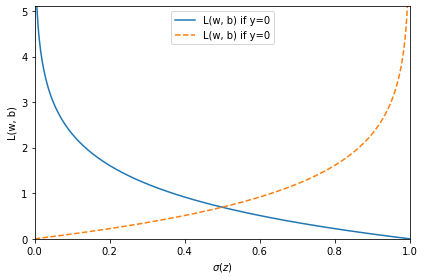

In [13]:
def loss_1(z):
    return - np.log(sigmoid(z))

def loss_0(z):
    return - np.log(1 - sigmoid(z))

z = np.arange(-10, 10, 0.1)
sigma_z = sigmoid(z)
c1 = [loss_1(x) for x in z]
plt.plot(sigma_z, c1, label='L(w, b) if y=0')
c0 = [loss_0(x) for x in z]
plt.plot(sigma_z, c0, linestyle='--', label='L(w, b) if y=0')
plt.ylim(0.0, 5.1)
plt.xlim([0, 1])
plt.xlabel('$\sigma(z)$')
plt.ylabel('L(w, b)')
plt.legend(loc='best')
plt.tight_layout()

plt.show()

In [14]:
class LogisticRegressionGD:
    """Gradient descent-based logistic regression"""
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
        
    def fit(self, X, y):
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=X.shape[1])
        self.b_ = np.float_(0.)
        self.losses_ = []
        
        for i in range(self.n_iter):
            net_input = self.net_input(X)
            output = self.activation(net_input)
            errors = (y - output)
            self.w_ += self.eta * 2.0 * X.T.dot(errors) / X.shape[0]
            self.b_ += self.eta * 2.0 * errors.mean()
            loss = (-y.dot(np.log(output))) - ((1 - y).dot(np.log(1 - output))) / X.shape[0]
            
            self.losses_.append(loss)
        return self
    
    def net_input(self, X):
        return np.dot(X, self.w_) + self.b_
    
    def activation(self, z):
        return 1. / (1. + np.exp(-np.clip(z, -250, 250)))
    
    def predict(self, z):
        return np.where(self.activation(self.net_input(X)) >= 0.5, 1, 0)
    
    

In [15]:
# No 2
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt


def plot_decision_regions(X, y, classifier, test_idx=None,
                          resolution=0.02):
    # setup marker generator and color map
    markers = ('o', 's', '^', 'v', '<')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    
    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    lab = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    lab = lab.reshape(xx1.shape)
    plt.contourf(xx1, xx2, lab, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    
    # plot class examples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],
                    y=X[y == cl, 1],
                    alpha=0.8,
                    c=colors[idx],
                    marker=markers[idx],
                    label=f'Class {cl}',
                    edgecolor='black')
        
        
        # highlight test examples
        if test_idx:
            # plot all examples
            X_test, y_test = X[test_idx, :], y[test_idx]
            
            plt.scatter(X_test[:, 0], X_test[:, 1],
                        c='none', edgecolor='black', alpha=1.0,
                        linewidth=1, marker='o',
                        s=100, label='Test set')

In [27]:
X_train_01_subset = X_train_std[(y_train == 0) | (y_train ==1)]
y_train_01_subset = y_train[(y_train == 0) | (y_train == 1)]
lrgd = LogisticRegressionGD(eta=0.3,
                           n_iter=1000,
                           random_state=1)
lrgd.fit(X_train_01_subset,
         y_train_01_subset)

plot_decision_regions(X=X_train_01_subset,
                      y=y_train_01_subset,
                      classifier=lrgd)

plt.xlabel('Petal lenght [standarized]')
plt.ylabel('Petal width [standarized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()


ValueError: cannot reshape array of size 150 into shape (212,215)

In [29]:
x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                       np.arange(x2_min, x2_max, resolution))
lab = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
lab = lab.reshape(xx1.shape)

IndentationError: unexpected indent (<ipython-input-29-f98b6a4551a2>, line 2)